In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
!pip list

Package              Version
-------------------- ---------
anyio                3.5.0
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
Babel                2.9.1
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               4.1.0
brotlipy             0.7.0
certifi              2022.9.24
cffi                 1.15.1
charset-normalizer   2.0.4
colorama             0.4.5
cryptography         37.0.1
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.3
fastjsonschema       2.16.2
idna                 3.3
ipykernel            6.15.2
ipython              8.4.0
ipython-genutils     0.2.0
ipywidgets           7.6.5
jedi                 0.18.1
Jinja2               3.0.3
json5                0.9.6
jsonschema           4.16.0
jupyter              1.0.0
jupyter_client       7.3.5
jupyter-console      6.4.3
jupyter_core         4.11.1
jupyter-ser

In [ ]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg','jpg','bmp','png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 27558 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [20]:
#Get another batch from the iterator
batch = data_iterator.next()

In [26]:
#Class 1 Uninfected
#Class 0 Parasitized
batch[0].shape

(32, 256, 256, 3)

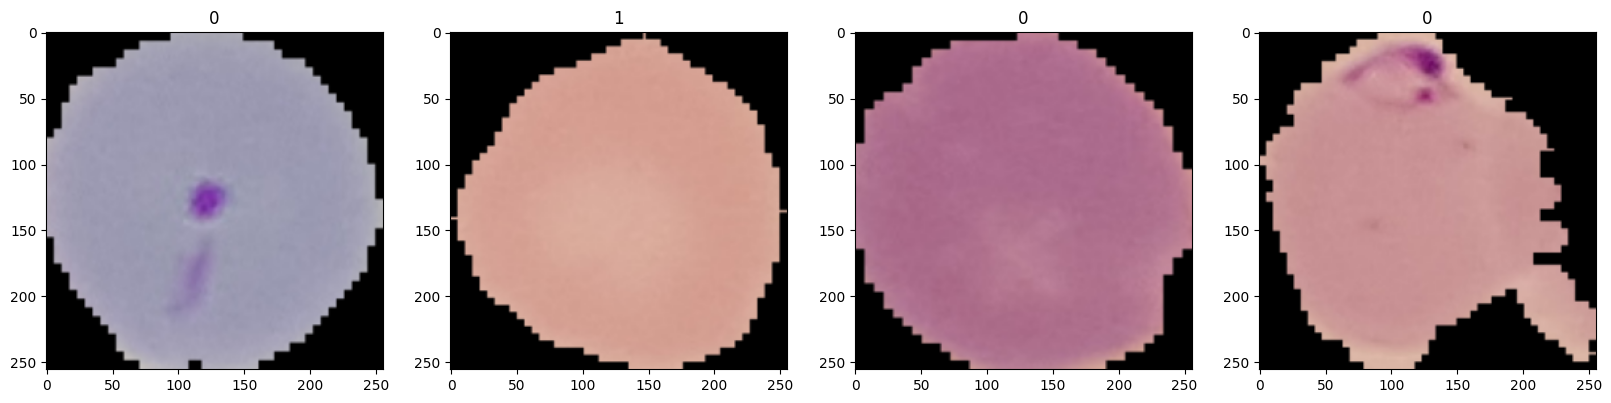

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))



In [16]:
data.as_numpy_iterator().next

<bound method _NumpyIterator.next of <tensorflow.python.data.ops.dataset_ops._NumpyIterator object at 0x0000020CFC27A650>>

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model = Sequential()

In [37]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu' ,input_shape=(256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 16)        4

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
603/603 [==============================] - 745s 1s/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4924
Epoch 2/20
603/603 [==============================] - 779s 1s/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 3/20
603/603 [==============================] - 795s 1s/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 4/20
603/603 [==============================] - 804s 1s/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6933 - val_accuracy: 0.4915
Epoch 5/20
603/603 [==============================] - 795s 1s/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 6/20
603/603 [==============================] - 791s 1s/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4945
Epoch 7/20
252/603 [===========>..................] - ETA: 6:45 - loss: 0.6932 - accuracy: 0.4945

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{ re.result().numpy()}, Accuracy: {acc.result().numpy()}')

In [ ]:
import cv2

In [ ]:
img = cv2.imread('parasitizedtest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Uninfected')
else:
    print(f'Predicted class is Parasitized')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','infectedmodel.h5'))


In [ ]:
new_model = load_model(os.path.join('models','infectedmodel.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Uninfected')
else:
    print(f'Predicted class is Parasitized')